# Shrey Viradiya
### 18BCE259

In [1]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt


## Perceptrol Learning for Multiclass

In [2]:
class Multiclass_Perceptron_learning():
    def __init__(self, file_path ,lr = 0.01, epochs =10, n_classes = 1):
        self.lr = lr
        self.epochs = epochs
        self.file = file_path
        self.data = pd.read_csv(self.file, header= None).values
        self.datapoints = self.data.shape[0]
        assert n_classes < self.data.shape[1]
        self.n_classes = n_classes        
        self.n_dimensions = self.data.shape[1] - self.n_classes
        

        print("Initializing Weights and Bias...")
        self.weights = 2 * np.random.random_sample((self.n_dimensions, self.n_classes)) - 1
        self.bias = np.random.random_sample((self.n_classes))

    def train(self):
        import time
        start = time.time()

        print("Starting Training...")
        for i in range(self.epochs):
            for j in range(self.datapoints):
                net = np.dot(self.data[j, :self.n_dimensions], self.weights) + self.bias
                a = net

                error = self.data[j, self.n_dimensions:] - a

                for c,e in enumerate(error):
                    self.weights[:, c] = self.weights[:, c] + self.lr * e * self.data[j, : self.n_dimensions]
                
                self.bias = self.bias + self.lr * error

        print(f"Training Complete: Time taken {time.time() - start}")
        print(self.weights)
        print(self.bias)

    def prediction(self, data):
        prediction = (np.dot(data[:, :self.n_dimensions], self.weights) + self.bias)
        prediction = np.ceil(prediction)
        print(f"\nPridictions -> {prediction}")

In [3]:
multiclass = Multiclass_Perceptron_learning('multiclass.csv', lr=0.01, epochs = 500, n_classes = 1)
multiclass.train()
multiclass.prediction(multiclass.data)

Initializing Weights and Bias...
Starting Training...
Training Complete: Time taken 0.6552860736846924
[[1.00000000e+00]
 [1.11482952e-15]]
[2.]

Pridictions -> [[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]]


## K-means clustering from Scratch

In [4]:
data = pd.read_csv('clustering.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


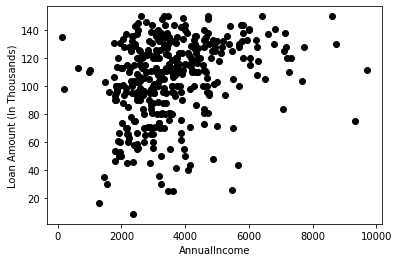

In [5]:
X = data[["LoanAmount","ApplicantIncome"]]

#Visualise data points
plt.scatter(X["ApplicantIncome"],X["LoanAmount"],c='black')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

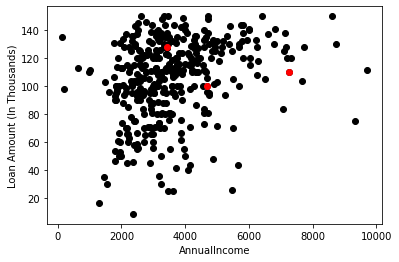

In [6]:
#number of clusters
K=3

# Select random observation as centroids
centroids = (X.sample(n=K))
plt.scatter(X["ApplicantIncome"],X["LoanAmount"],c='black')
plt.scatter(centroids["ApplicantIncome"],centroids["LoanAmount"],c='red')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

In [7]:
difference = 1
j=0

while(difference!=0):
    XD=X
    i=1
    for index1,row_c in centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["ApplicantIncome"]-row_d["ApplicantIncome"])**2
            d2=(row_c["LoanAmount"]-row_d["LoanAmount"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    centroids_new = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]
    if j == 0:
        difference=1
        j=j+1
    else:
        difference = (centroids_new['LoanAmount'] - centroids['LoanAmount']).sum() + (centroids_new['ApplicantIncome'] - centroids['ApplicantIncome']).sum()
        print(difference.sum())
    centroids = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]

-305.38234925423177
-213.65369789532534
-245.99412262812996
-304.06756061291264
-80.07541652437475
-163.2283919837503
-144.67450430112757
-93.32770782368112
-65.06691416725587
-55.03495831127759
-9.190752402517077
-9.19844100901777
-9.237706177129652
0.0


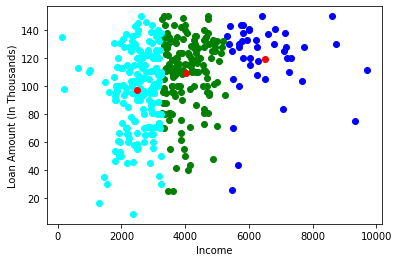

In [8]:

color=['blue','green','cyan']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["ApplicantIncome"],data["LoanAmount"],c=color[k])
plt.scatter(centroids["ApplicantIncome"],centroids["LoanAmount"],c='red')
plt.xlabel('Income')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()